<h1> Welcome to the Southern Water Corp Python Case Study!</h1>

While working on the Statistics unit, you used Microsoft Excel's data analytics capabilities to analyze Southern Water Corp's Pump Data.

You might have realised that whilst `Excel` is powerful, it was a bit tricky creating Box Plots, multiple line plots and in general, doing quick analysis in Excel.

In this Case Study, we're going to *revisit* the Pump Data, but add in a few different questions that help us better see how we can use Python to speed up our analysis as well as showing you how powerful Python's plotting and modelling libraries can be! 


<b>`Please note that this case study is composed of two parts** — once you have completed part 1, which involves descriptive statistics, please submit your work and discuss it with your mentor before moving on to part 2.`</b>

<H3>  Let's get started! </H3>

<img src = 'https://www.sdcwa.org/wp-content/uploads/2020/10/Seawater-Desalination.jpg'>

---

# Part I: <span style="color:green">Descriptive Statistics</span>

### Step 1: <span style="color:green">Import Libraries</span> 

Import the libraries you'll need for your analysis. You will need the following libraries: 

**Matplotlib** - This is Python's basic plotting library.
You'll use the pyplot and dates function collections from matplotlib throughout this case study so we encourage you to important these two specific libraries with their own aliases. Also, include the line **'%matplotlib inline'** so that your graphs are easily included in your notebook. 

**Seaborn** - This library will enable you to create aesthetically pleasing plots.

**Pandas** - This library will enable you to view and manipulate your data in a tabular format.

**statsmodels.api** - This library will enable you to create statistical models. You will need this library when performing regession analysis in Part 2 of this case study.

Please note we've included the necessary libraries below for you to help you get started!

This code controls how big your charts will be with the syntax of (X,Y) where X represents the X Axis and Y, the Y Axis.

## Place your code here

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

---------------------------------------------------------------------------


### Step 2: <span style="color:green">Descriptive Statistics</span> 
The data you've received from Southern Water Corp has been split into two files.
The first file, titled DF_Raw_Data contains all the 'raw' Pump Data you will need for your analysis.
The second file, titled DF_Rolling_Stdev contains the Rolling Standard Deviation Data you will need for questions 10 Onwards.

We have **deliberately** set up the data in this manner so please ensure that when you need to perform the rolling standard deviation calculations, you use the **DF_Rolling_Stdev.csv** file.



<h3> Please complete the following below: </h3>

i. Import each of the two data sources and store them into their individual dataframes. 

We suggest you use the names : **dataframe_raw & dataframe_stdev respectively**. 

ii. Print descriptive statistics for each of the dataframes using **.describe()** and **.info()**

In [4]:
import pandas as pd

dataframe_raw = pd.read_csv('DF_Raw_Data.csv')
dataframe_stdev = pd.read_csv('DF_Rolling_Stdev.csv')

In [6]:
print(dataframe_raw.describe())
print(dataframe_raw.info())

       Volumetric Flow Meter 1  Volumetric Flow Meter 2  Pump Speed (RPM)  \
count              2453.000000              2453.000000       2453.000000   
mean                 41.802629                41.796702         90.796576   
std                   3.656576                 3.654873         10.217885   
min                   0.000000                 0.000000          0.000000   
25%                  41.050000                41.000000         85.000000   
50%                  42.100000                42.140000         91.000000   
75%                  43.140000                43.130000         97.000000   
max                  45.900000                45.840000        124.000000   

       Pump Torque   Ambient Temperature  Horse Power  Pump Efficiency  \
count   2453.000000          2453.000000  2453.000000      2453.000000   
mean     202.851610            50.226661     3.540897        76.015149   
std       22.683977             5.298203     0.579055         6.651633   
min       

---------------------------------------------------------------------------

### Step 3: <span style="color:green">Create a Boxplot</span> 

When you look at your dataframe, you should now be able to see the upper and lower quartiles for each row of data from the **.describe** command you used previously.

This should give you an understanding of the number of entires in each dataset (~2,452). 

However, just as you learned when using Excel, creating a visualization of the data using Python is often more informative than viewing the table statistics. Next up — convert the dataframes you created into a boxplot by following these instructions:

<H3> <span style="color:green"> Please repeat these steps for both the dataframe_raw dataset and the dataframe_stdev dataset </span></H3> 

i) Using the dataframe, create a boxplot visualising this information.

ii) Using the dataframe, create a lineplot visualising this information.

An example of the syntax to consider would be:

    dataframe.plot(kind='box')
    plt.show()

Hint: You might want to reference the following .plot function <a href = https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html> here </a> 


<h3> Please put your code here </h3>


#### We've included an example of what your Box Plot and Line Plot *should* look like once you've plotted this using the dataframe_raw and dataframe_stdev datasets.

<Axes: >

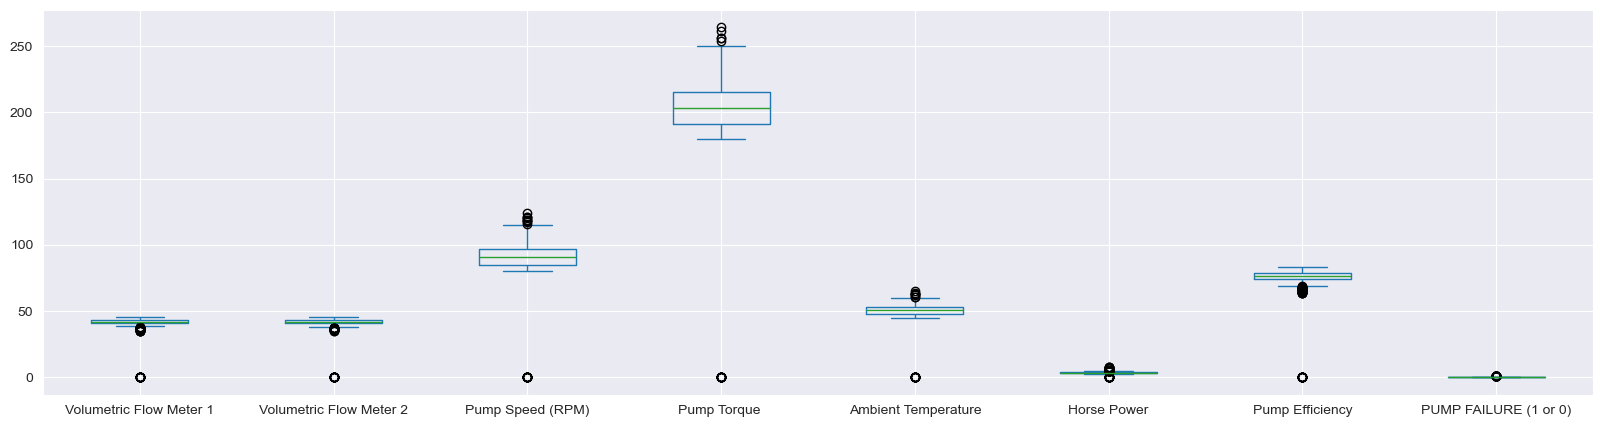

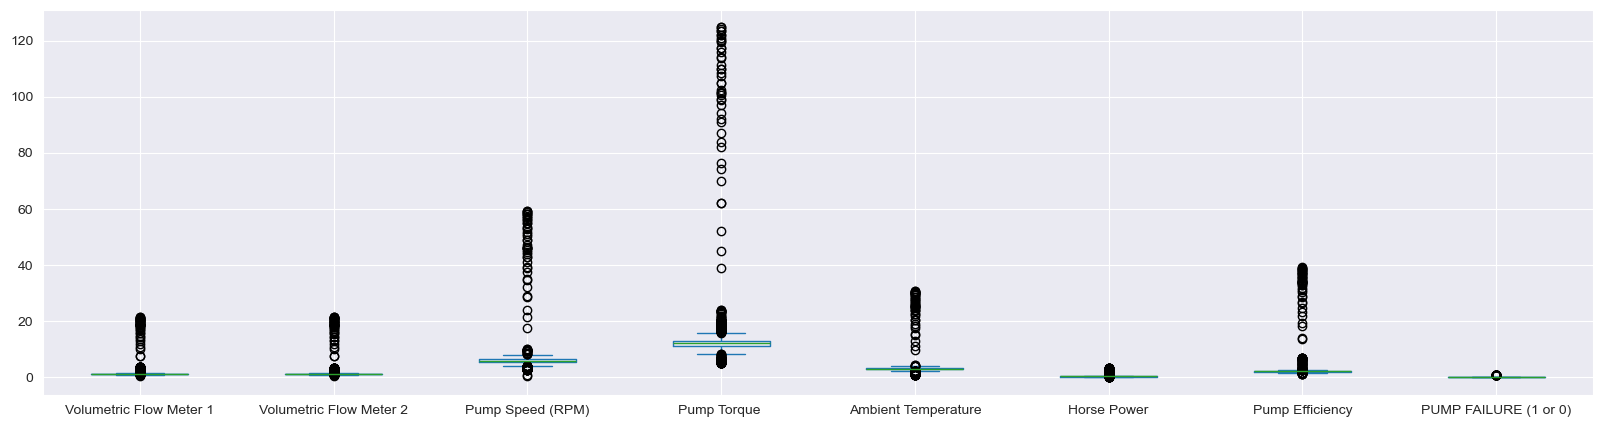

In [8]:
dataframe_raw.plot(kind='box')
dataframe_stdev.plot(kind='box')

<Axes: >

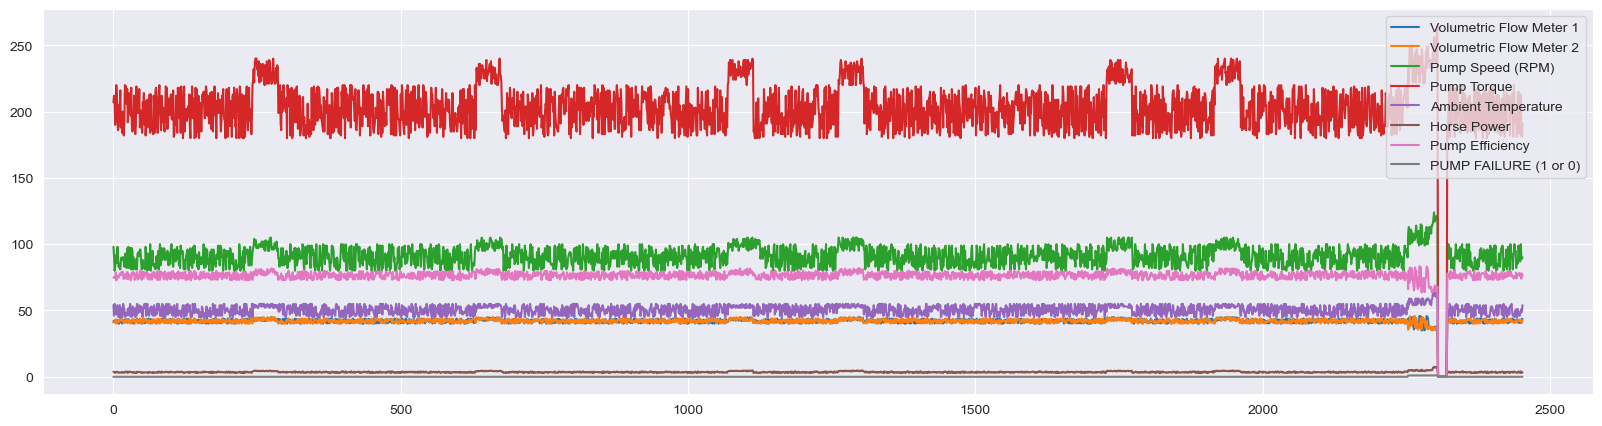

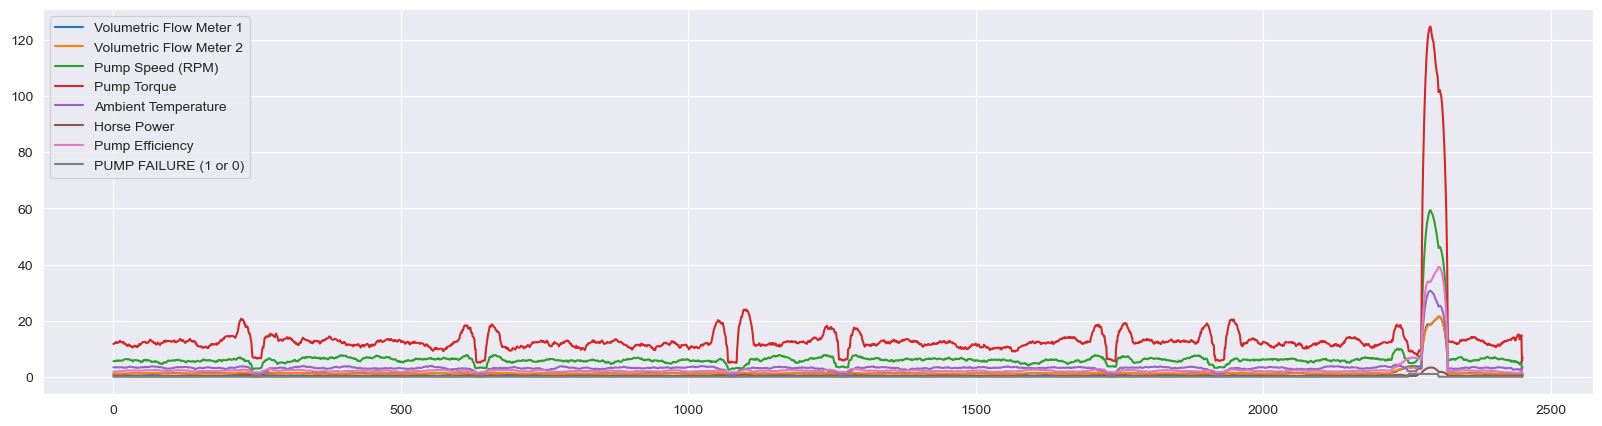

In [10]:
dataframe_raw.plot(kind='line')
dataframe_stdev.plot(kind='line')

**What have you observed from the boxplot and line plots for both the dataframe_raw and dataframe_stdev datasets?**

Dataframe_stdev has a tight boxplot range, leading to a wider range of outliers. Dataset_raw pump torque and pump speed(RPM) show the greatest range and variability. The line graphs show intervals of spikes. The dataframe_stdev graph shows all variables spiked during pump failure, but pump torque disproportionately had the largest spike. This suggests pump torque is the most sensitive and closely related to failures.

---------------------------------------------------------------------------

### Step 4: <span style="color:green">Filtered Dataframes with Box Plots</span> 

You would have noted the datasets we have contain a Pump Failure (1 or 0) Variable that indicate whether the Pump is Failing (1) or whether the Pump is behaving normally (0).  
    
It is very likely we will see differences in the overall populations of Pre-Failure vs. Post Failure.
To visualise this difference, we should separate our datasets, filtering for when the Pump Failure is = 0 or when the Pump Failure =1 and see what trends emerge. 
    
This will require you to <b> SUBSET </b> your dataframe using *boolean filters*.

We've included an example below to show-case how this syntax works:

    condition_1 = dataframe['SomeColumn']== 1
    dataframe_0 = dataframe[condition_1] 
    dataframe.plot(kind='box')
    plt.title("Example Plot")
    plt.show()
    

<H3> <span style="color:green"> Please repeat these steps for both the dataframe_raw dataset and the dataframe_stdev dataset </span></H3> 

i) Using the dataframe_raw dataset, create two boxplots specifically for when the Pump has failed (i.e. Pump Failure = 1)  and 0 (Pump is in normal operations). 

As part of best practice, don't forget to clearly title your box plots so we can identify which plot is for the failure and which plot is for the normal operations.

To do this, you'll have to recall how to apply **boolean** filtering to a dataframe. If you're not sure how to do this, re-read the hints we've given above and pay careful attention to the Syntax we've shown.



## Please put your code here

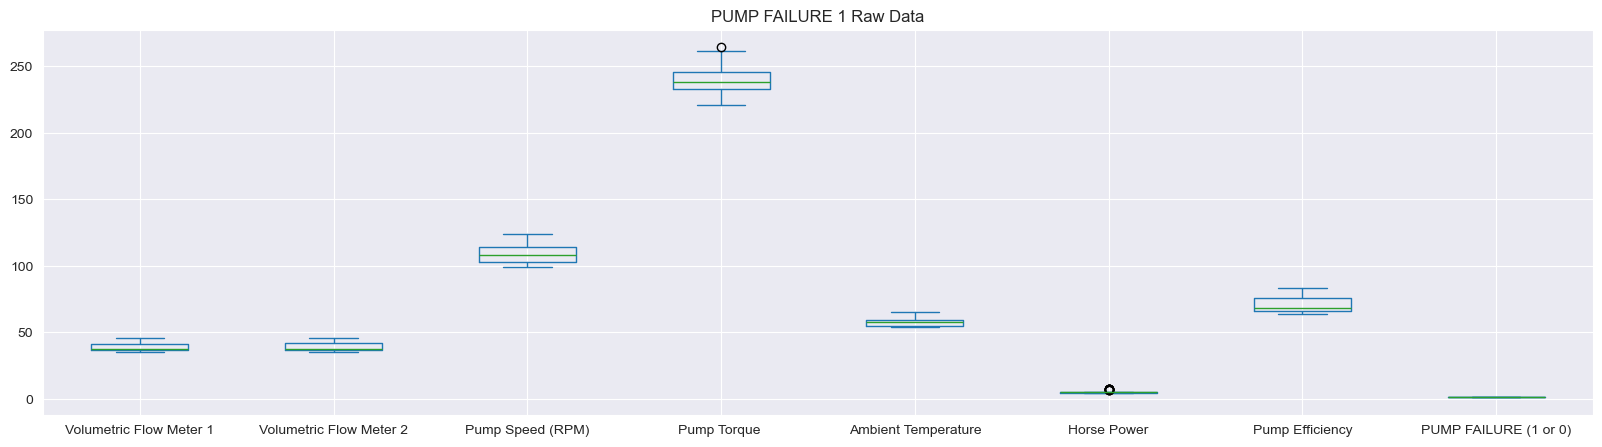

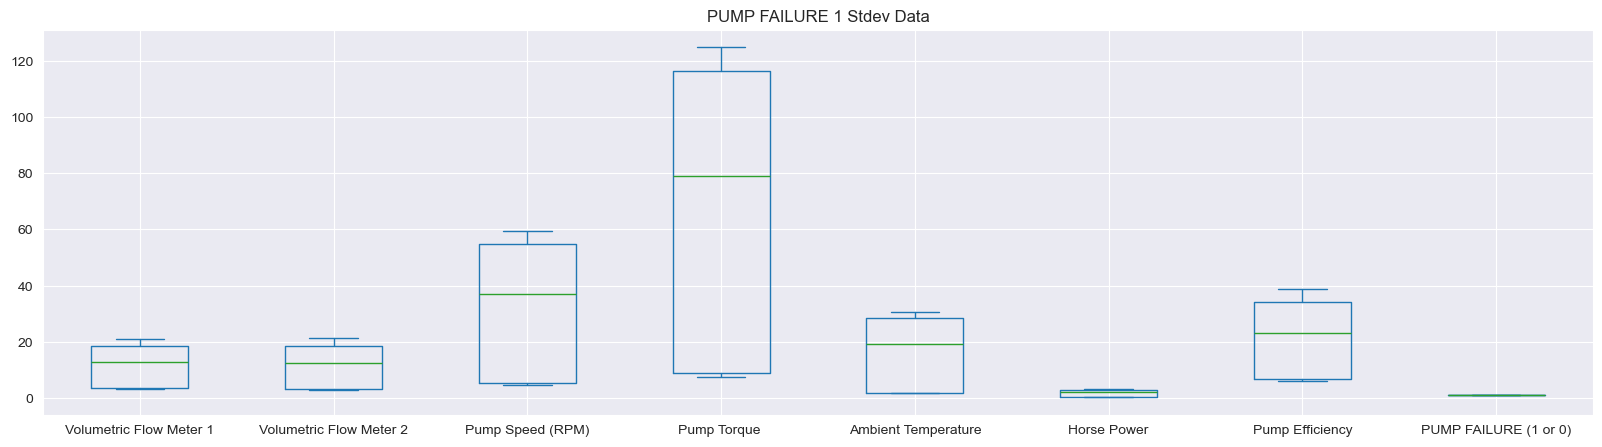

In [12]:
dataframe_failure_1 = dataframe_raw[dataframe_raw['PUMP FAILURE (1 or 0)']== 1]
dataframe_failure_1.plot(kind='box')
plt.title("PUMP FAILURE 1 Raw Data")
plt.show()

dataframe_failure_1 = dataframe_stdev[dataframe_stdev['PUMP FAILURE (1 or 0)']== 1]
dataframe_failure_1.plot(kind='box')
plt.title("PUMP FAILURE 1 Stdev Data")
plt.show()

<h3> What have you noticed when you compared the dataset in this manner? </h3>

Limiting to just failed cases, dataframe_raw shows a smaller, concentrated range. Pump Torque and pump speed (RPM) continue to show large ranges even in the standard deviated data. I suggest modeling this failure distribution, which will be necessary.

Limiting to just failed cases, dataframe_raw shows a smaller, concentrated range. Pump Torque and pump speed (RPM) continue to show large ranges even in the standard deviated data. I suggest modeling this failure distribution, which will be necessary.

Now a quick analysis might show-case there are many *outliers* that exist in our dataset.

As we all know, Outliers can easily *skew* our analysis and we might want to remove them.

Let's experiment with removing Outliers with the following steps:

The general logic for removing an outliers is:

<b> Any Value that is either Q1 - 1.5x IQR or greater than Q3 + 1.5x IQR is considered an outlier. </b>

Where Q1 = Quartile 1 and Q3 = Quartile 3

Let's break these down to a few simple steps and tackle how to calculate this.

<b>

    1. Define the Quartiles Q1 and Q3. 
    
    2. Calculate the Interquartile Range (Q3 - Q1)
    
    3. Create two new variables; Lower_Range (Q1 - 1.5x IQR) and Upper_Range ( Q3 + 1.5x IQR).
    
    4. Using Boolean Subsetting, filter the Dataframe for Outliers and remove them
    
    5. Calculate what the proportion of Outliers exist (i.e. Number of entries left after Outlier removal / Number of total entries in dataset) 

</b>

### Step 5: <span style="color:green">Create Quartiles</span> 

Create two new variables called Q1 and Q3 using the dataframe_raw dataset. 

i) Q1 should contain the <b> 25th percentile for all columns in the dataframe while Q3 should contain the 75th percentile </b> for all the columns in the dataframe.

You may want to use the .quantile() function explained <a href = https://www.geeksforgeeks.org/python-pandas-dataframe-quantile/> here </a> 

ii) After defining Q1 and Q3, calculate the interquartile range **(IQR = Q3 - Q1)** for all columns in the dataframe and print it to the screen.

We've included a sample of the IQR output below for your reference!

## Please put your code here

In [14]:
Q1 = dataframe_raw.quantile(.25, numeric_only = True)
Q3 = dataframe_raw.quantile(.75, numeric_only = True)
IQR = Q3 - Q1
print(IQR)

Volumetric Flow Meter 1     2.09
Volumetric Flow Meter 2     2.13
Pump Speed (RPM)           12.00
Pump Torque                24.00
Ambient Temperature         5.00
Horse Power                 0.56
Pump Efficiency             3.91
PUMP FAILURE (1 or 0)       0.00
dtype: float64


---------------------------------------------------------------------------

### Step 6: <span style="color:green">Identify Outliers</span> 

Continuing in from Step 5 - we still need to calculate how we can remove our outliers.

We're aware of the overall formula as shown per below.

<b> Outlier = Q1 - 1.5x IQR OR Q3 + 1.5x IQR </b>

Now let's work out how we can identify these Outliers step by step. 

<b> i) Define two new variables, Lower_Limit and Upper_Limit can be calculated as:</b>
<p>
<li> Lower_Limit = Q1 - 1.5 * IQR </li>
<li> Upper_Limit = Q3 + 1.5 * IQR </li> 
   
<b> ii) Using Lower_Limit and Upper_Limit with an OR (|) condition, filter the dataframe to include *only* the Outliers. How many Outliers do we have?</b>
    
The syntax should look like this:
    
<b>`Outliers = dataframe_raw[((dataframe_raw[IQR.index] < lower_limit) | ((dataframe_raw[IQR.index] > upper_limit))).any(axis=1)]`</b>
    
The `.any(axis=1)` indicates that for *any* entry in the columns that matches the criteria of being *less* than the lower limit or *greater* than the upper limit, for that column (axis=1), that row will be removed. 

If you're stuck, <a href = https://stackoverflow.com/questions/54398554/how-to-remove-outliers-in-python> here's </a> a link that will show you how you can remove Outliers in Python! 

<b> iii) What is the percentage of data that remains after we've removed the Outliers from the dataframe_raw dataset?</b>
    

## Please put your code here

In [16]:
Q1 = dataframe_raw.quantile(0.25,numeric_only=True)
Q3 = dataframe_raw.quantile(0.75, numeric_only = True)
IQR = Q3 - Q1
IQR

Volumetric Flow Meter 1     2.09
Volumetric Flow Meter 2     2.13
Pump Speed (RPM)           12.00
Pump Torque                24.00
Ambient Temperature         5.00
Horse Power                 0.56
Pump Efficiency             3.91
PUMP FAILURE (1 or 0)       0.00
dtype: float64

In [18]:
dataframe_raw.count()

Data Source                2453
TIMEFRAME (DD/MM/YYYY)     2453
Volumetric Flow Meter 1    2453
Volumetric Flow Meter 2    2453
Pump Speed (RPM)           2453
Pump Torque                2453
Ambient Temperature        2453
Horse Power                2453
Pump Efficiency            2453
PUMP FAILURE (1 or 0)      2453
dtype: int64

In [20]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(lower_limit, upper_limit)

Volumetric Flow Meter 1     37.915
Volumetric Flow Meter 2     37.805
Pump Speed (RPM)            67.000
Pump Torque                155.000
Ambient Temperature         40.500
Horse Power                  2.380
Pump Efficiency             68.695
PUMP FAILURE (1 or 0)        0.000
dtype: float64 Volumetric Flow Meter 1     46.275
Volumetric Flow Meter 2     46.325
Pump Speed (RPM)           115.000
Pump Torque                251.000
Ambient Temperature         60.500
Horse Power                  4.620
Pump Efficiency             84.335
PUMP FAILURE (1 or 0)        0.000
dtype: float64


In [21]:
# Assuming Q1, Q3, and IQR are already defined and are single values for the entire dataframe
# If they are calculated for each column, you need to apply them column-wise

# Number of entries in original dataframe #
print("Length of Raw data :- ", len(dataframe_raw))

# Select only numeric columns for outlier detection
numeric_data = dataframe_raw.select_dtypes(include=['number'])

# Calculate low and upper limits for each numeric column
low_limit = numeric_data.quantile(0.25) - 1.5 * (numeric_data.quantile(0.75) - numeric_data.quantile(0.25))
upper_limit = numeric_data.quantile(0.75) + 1.5 * (numeric_data.quantile(0.75) - numeric_data.quantile(0.25))

# Identifying and removing the outliers #
dataframe_raw_outliers = dataframe_raw[~((numeric_data < low_limit) | (numeric_data > upper_limit)).any(axis=1)]
print("Length of raw data after removing outliers", len(dataframe_raw_outliers))

# Number of outliers in the dataframe #
num_outliers = len(dataframe_raw) - len(dataframe_raw_outliers)
print("Number of outliers", num_outliers)

# Calculating Proportion of outliers in dataframe #
proportion = round((len(dataframe_raw) - len(dataframe_raw_outliers)) / len(dataframe_raw) * 100, 2)
print("Proportion of outliers", proportion, '%')

Length of Raw data :-  2453
Length of raw data after removing outliers 2358
Number of outliers 95
Proportion of outliers 3.87 %


<b> Now that you've removed the Outliers and discovered you still have a significant amount of data left - do you think removing Outliers is problematic or not? Please state your answer below and explain what your thoughts are. </b> 


Removing the outliers is not a good option. It will remove the other values that we need to observe and create issues in further analyses.

Now in the previous exercise, we've identified how we can calculate Outliers. Now we want to remove *all* the outliers in our dataset and see what this looks like in our box plots. 

We've defined our Outliers dataframe as per below:

`Outliers = dataframe_raw[((dataframe_raw[IQR.index] < lower_limit) | ((dataframe_raw[IQR.index] > upper_limit))).any(axis=1)]`

<b> We're now going to add one symbol that will help us return a dataframe with 0 Outliers.

This is the ~ Symbol. </b>

Essentially this Symbol tells Python to 'invert' the current boolean Value from True, to False.

An example use of this syntax would be:
    
    some_dataframe = some_dataframe[ ~ ( (some_condition) ) ]


### Step 7: <span style="color:green">Create a Boxplot without Outliers</span> 

i) Create a new dataframe called no_outliers and using the ~ operator, remove all the Outliers from the dataframe <p>
ii) Using the no_outliers dataframe, create two box plots as per below: <p>
    <li> A boxplot when PUMP FAILURE is 1 (Failure) </li>
    <li> A boxplot when PUMP FAILURE is 0 (Normal Behaviour) </li> 

<b> Did any of your plots reveal nothing to plot? If yes, why might that be...? Think very carefully regarding what you have performed. </b>


## Please put your code here

<Axes: title={'center': 'BoxPlot: Raw Data When Pump Failure = 0'}>

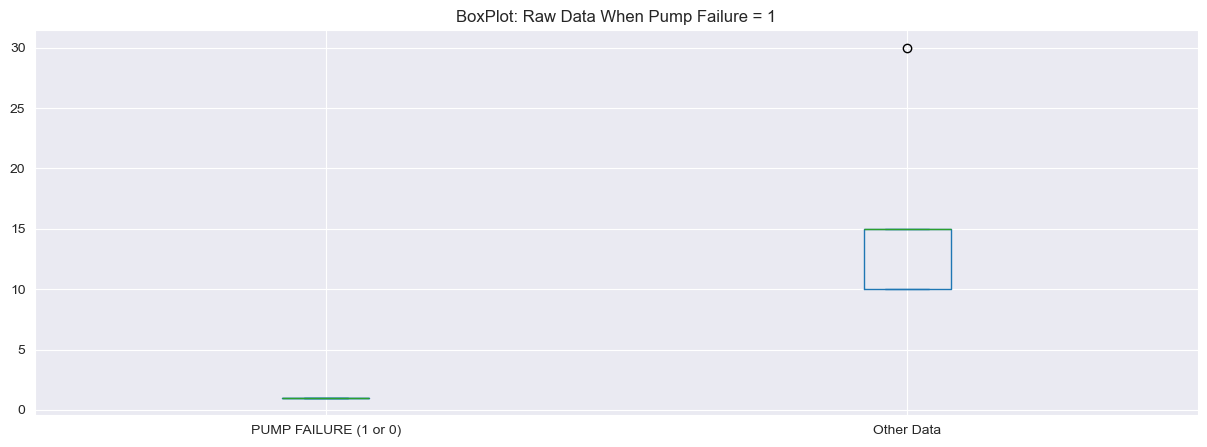

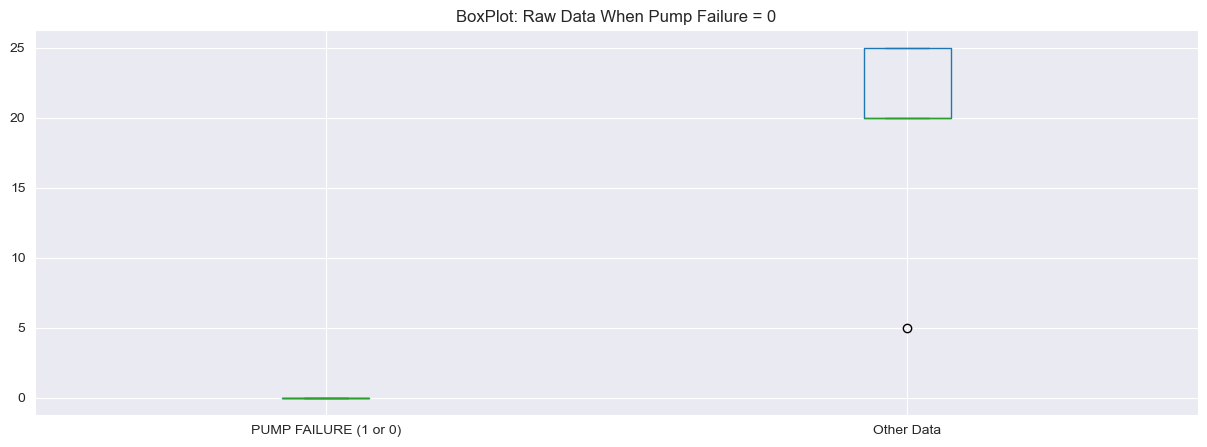

In [28]:
import pandas as pd

# Example: Creating a sample DataFrame to simulate 'dataframe_raw_outliers'
data = {
    'PUMP FAILURE (1 or 0)': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
    'Other Data': [10, 20, 15, 25, 30, 5, 10, 20, 15, 25]
}
dataframe_raw_outliers = pd.DataFrame(data)  # Define the DataFrame

# Distributing the data for pump failure or normal #
Pump_Failure_out = dataframe_raw_outliers['PUMP FAILURE (1 or 0)'] == 1
Pump_Normal_out = dataframe_raw_outliers['PUMP FAILURE (1 or 0)'] == 0 

dataframe_failure_out = dataframe_raw_outliers[Pump_Failure_out]
dataframe_normal_out = dataframe_raw_outliers[Pump_Normal_out]

# Plotting the data for pump failure or normal #
dataframe_failure_out.plot(kind='box', title='BoxPlot: Raw Data When Pump Failure = 1', figsize=(15, 5))
dataframe_normal_out.plot(kind='box', title='BoxPlot: Raw Data When Pump Failure = 0', figsize=(15, 5))  # Added missing closing parenthesis

<h3> <span style="color:orange"> 🛑 Please note that Step 8 and Step 9 are Challenge Questions and will <u>intentionally</u> be more difficult 🛑 </h3> 

### Step 8: <span style="color:green">Plot and Examine Each Column</span> 



As you might recall from the earlier plot you had made with the line plot; it was hard to see which variables were the most significant with respect to pump failure when all the variables are plotted together. This is common when variables are at different scales, the trends can be more challenging to interpret. This is why we are going to ITERATE through the dataframe and plot each individual variable out and compare this with the Pump Failure for a more streamlined analysis.

This will require you to make use of the following syntax:

1. Define a list variable called `ListOfVariables`; this is to contain the column names of all the **numerical** variables you wish to iterate through in the `dataframe_raw` dataset <p>

2. Instantiate your for loop with the following syntax: 
       
            for item in ListOfVariables:
            first_axis = dataframe[___].plot #We are looping through every item in the dataframe.
            second_axis = first_axis.twinx() #The Twinx function is used to ensure we share the X-Axis for both plots
            second_axis.plot(dataframe['ColumnOfInterest'], color='teal')
            plt.title(item)
            plt.show()
        
<b> i) Using the syntax provided, loop through the dataframe_raw dataset, plotting every variable individually, against the Pump Failure to better identify trends. </b>

**Note:** For each plot, ensure that you have a dual axis set up so you can see the Pump Failure (0 or 1) on the second Y-axis, and the attribute on the first Y-Axis. 

Check out this link to learn how to do this: https://matplotlib.org/gallery/api/two_scales.html


## Please put your code here

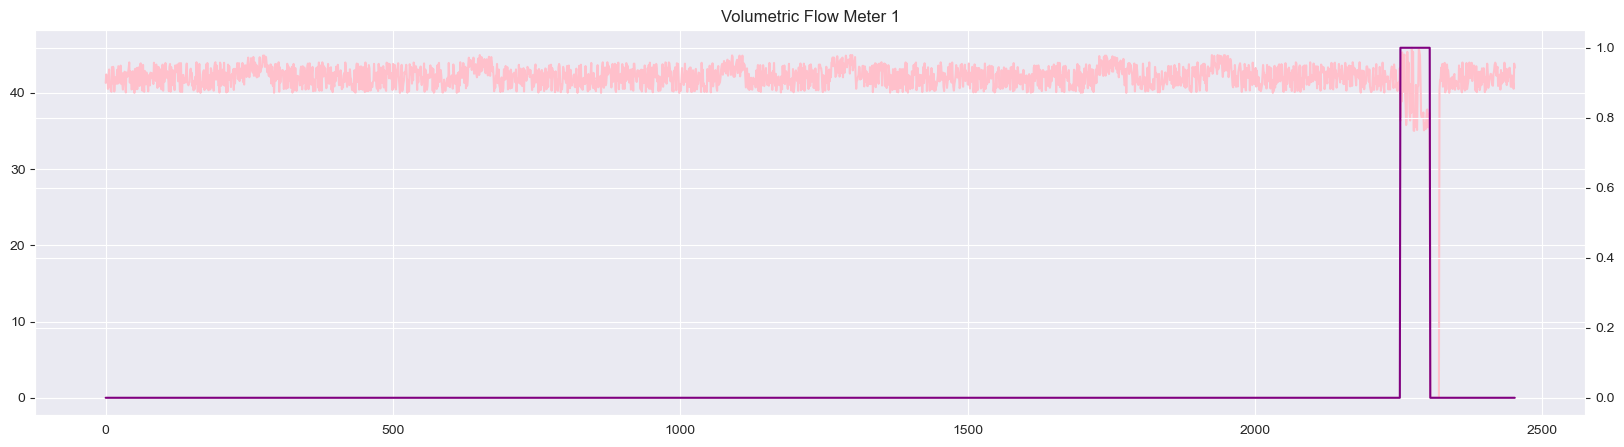

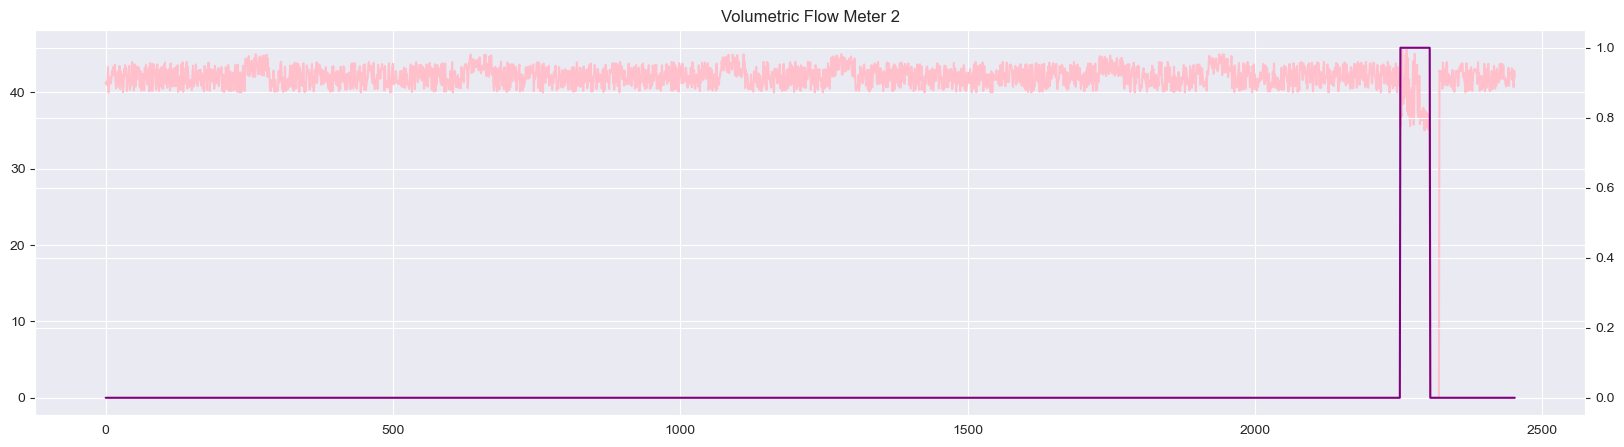

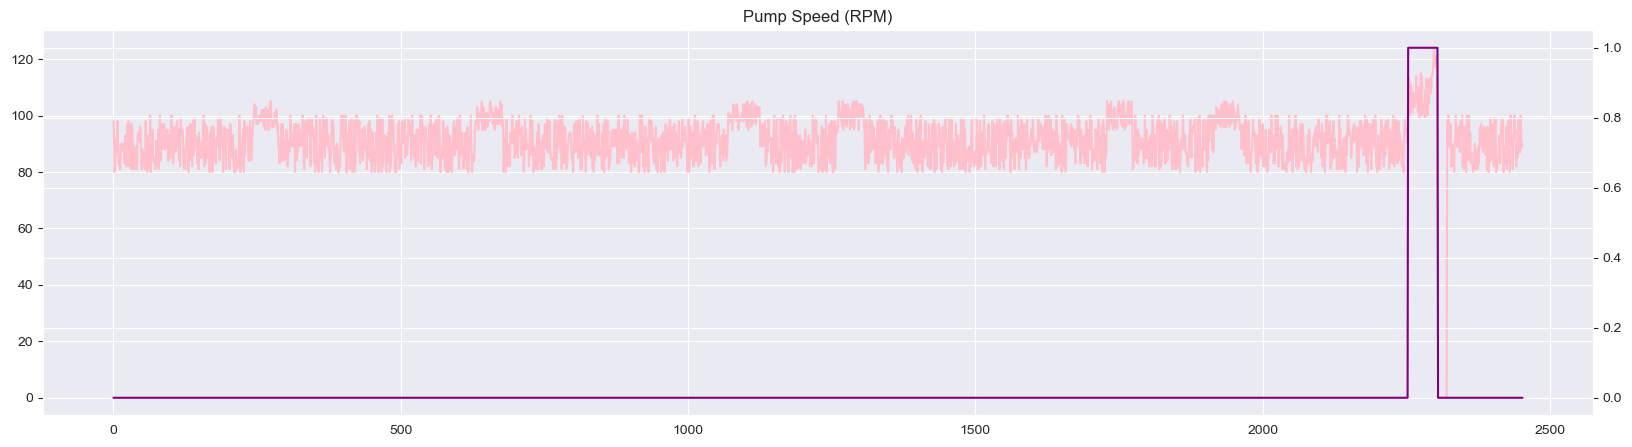

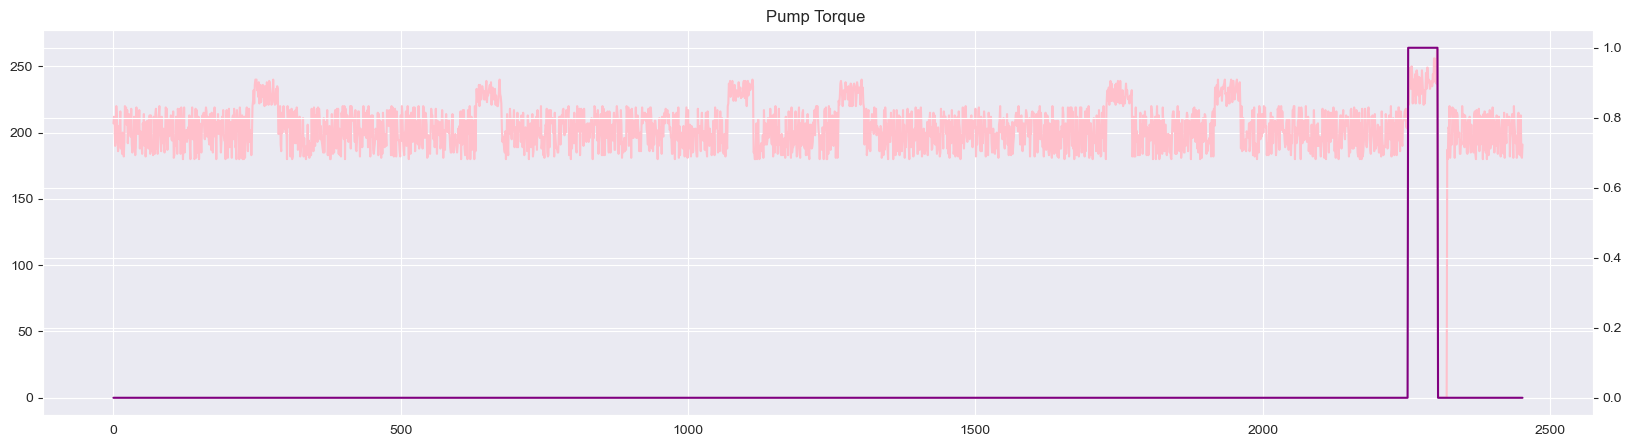

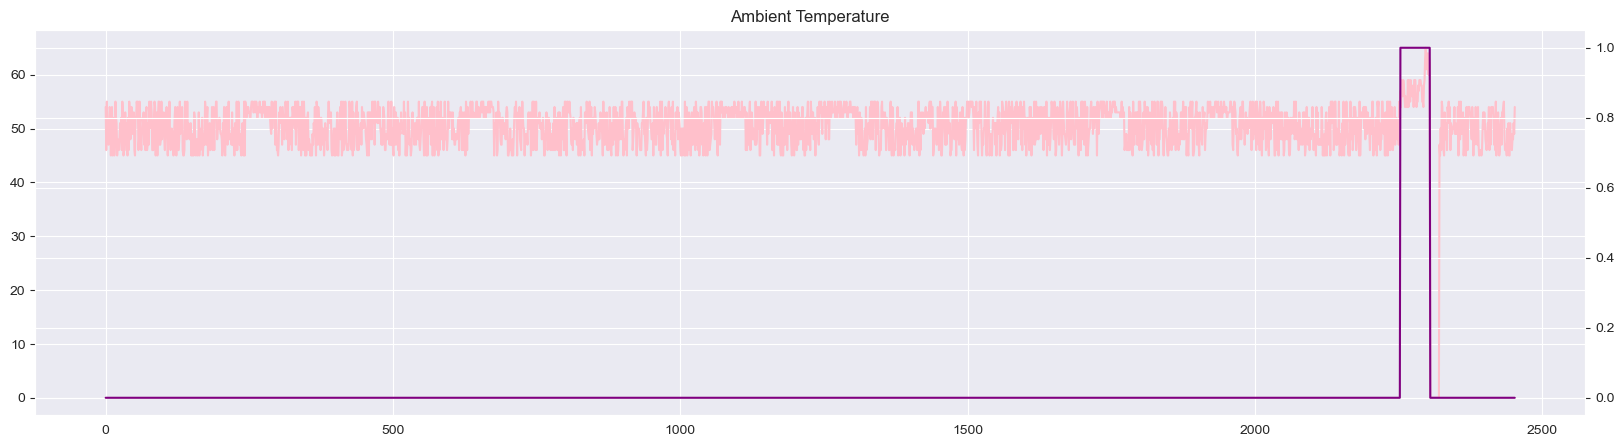

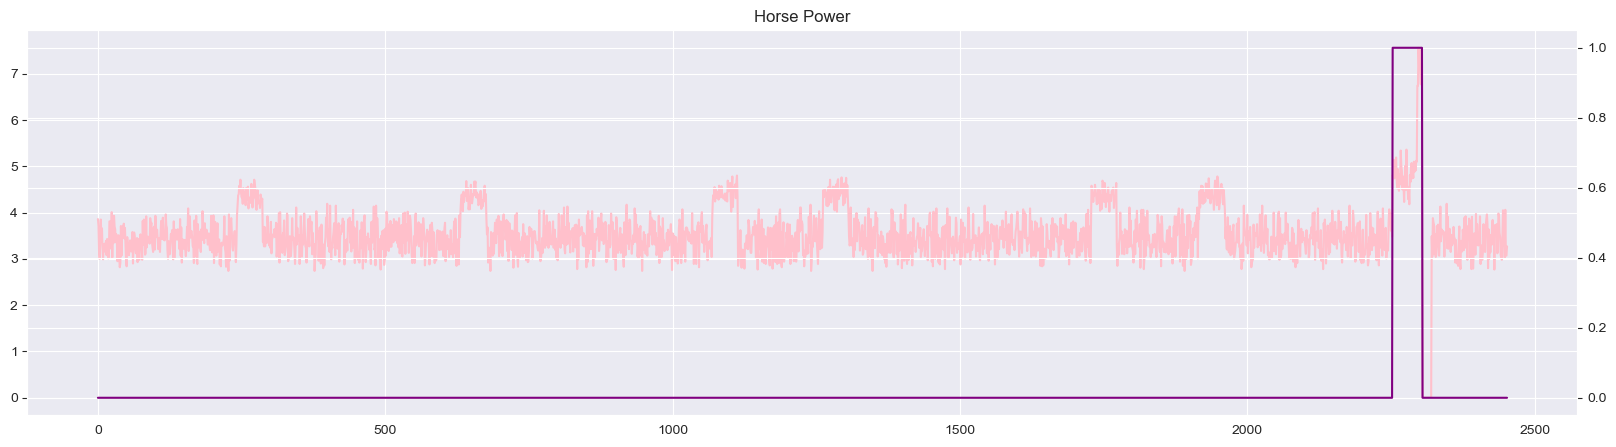

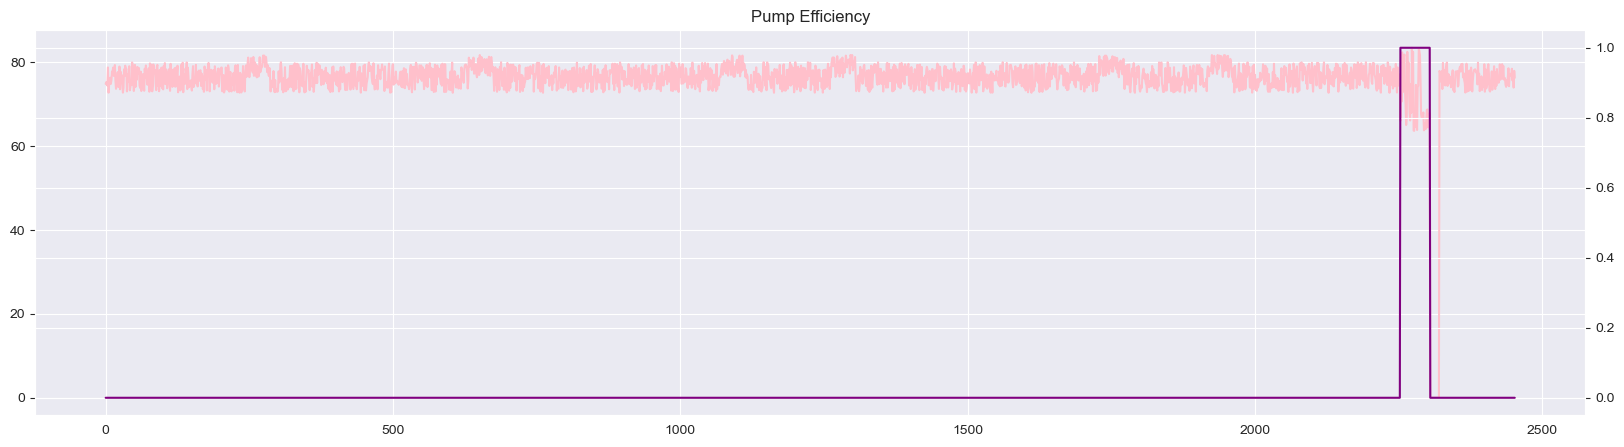

In [30]:
listofvariables = range(2,9)
for item in listofvariables:
    fig, ax1 = plt.subplots()
    ax1.plot(dataframe_raw.iloc[:,item], color = 'pink')
    ax1.tick_params(axis='y')
    ax2 = ax1.twinx()
    ax2.plot(dataframe_raw.iloc[:,-1], color = 'purple')
    plt.title(dataframe_raw.columns[item])
    plt.show

<b> Have you noticed any particular trends when looking at the data in this way? Has it made it easier to see which variables *might* be reacting more strongly to the Pump Failure than others? </b> 

During pump failure, Horse Power, Ambient Temperature, Pump Torque, and Pump Speed seemed to spike, indicating a possible strong reaction.

<h3>  <span style="color:green">This is where we will switch to using the dataframe_stdev that you had previously defined in Q1, dataframe_stdev </span> </h3>

---

Now that we've iterated through the dataframe_raw, we're going to do a similar exercise but with the dataframe_stdev dataset.

In these next few exercises we'll be seeking to better understand how we make use of Pythons Powerful Inferential Statistics and Plotting libraries to Zoom In on periods of interest that we'd like to examinate further.

We'll first have you prepare the dataframe with the TIMEFRAME (DD/MM/YYYY) column set as the index.

You might ask; What is an Index?

An **index** is used as a unique identifier for each record in the dataset. This is used primarily for JOINING operations (think SQL joins), or in our case, for filtering on a specific time period.

You'll be making use of the following function:

    dataframe.set_index(['someColumn', inplace=True)

For an example of how this works, click <a href = https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html> here </a>:


### Step 9: <span style="color:green">Create a Plot for Pump Failures Over a Rolling Time Period</span> 

i) Set the **index of the dataframe_stdev** dataset to the TIMEFRAME (DD/MM/YYYY) attribute.

ii) Using the List_Of_Variables you created in Step 8, Re-plot all the numerical variables in the dataframe_stdev for the following time periods:
     10/12/2014 12:00 to 10/12/2014 14:30.

Please ensure you set the secondary axes as the Pump Failure Variable so you can observe how the variables move with respect to Pump Failure. 

    for item in ListOfVariables:
        first_axis = dataframe[___].plot() #We are looping through every item in the dataframe.
        first_axis.xaxis.set_major_locator(plt.MaxNLocator(10)) #This will ensure we only plot a maximum of 10 Time Stamps
        second_axis = first_axis.twinx() #The Twinx function is used to ensure we share the X-Axis for both plots
        second_axis.plot(dataframe['ColumnOfInterest'], color='orange')
        second_axis.xaxis.set_major_locator(plt.MaxNLocator(10))
        plt.title(item)
        plt.show()

<b>Note: To filter on the time period you will need to make use of the below syntax which *should* be familiar to you as you are subsetting your dataframe, but instead of on a column, you're subsetting a time period. </b>

    dataframe_time_filtered = dataframe[(dataframe.index >= "_____") & (dataframe.index <= "_____")]


## Please put your code here

<h4> The output from your code should display image(s) like the one shown below </h4>

In [32]:
dataframe_stdev = dataframe_raw.set_index('TIMEFRAME (DD/MM/YYYY)')
df_filtered = dataframe_stdev[(dataframe_stdev.index >= '10/12/2014 12:00') & (dataframe_stdev.index <= '10/12/2014 14:30')]

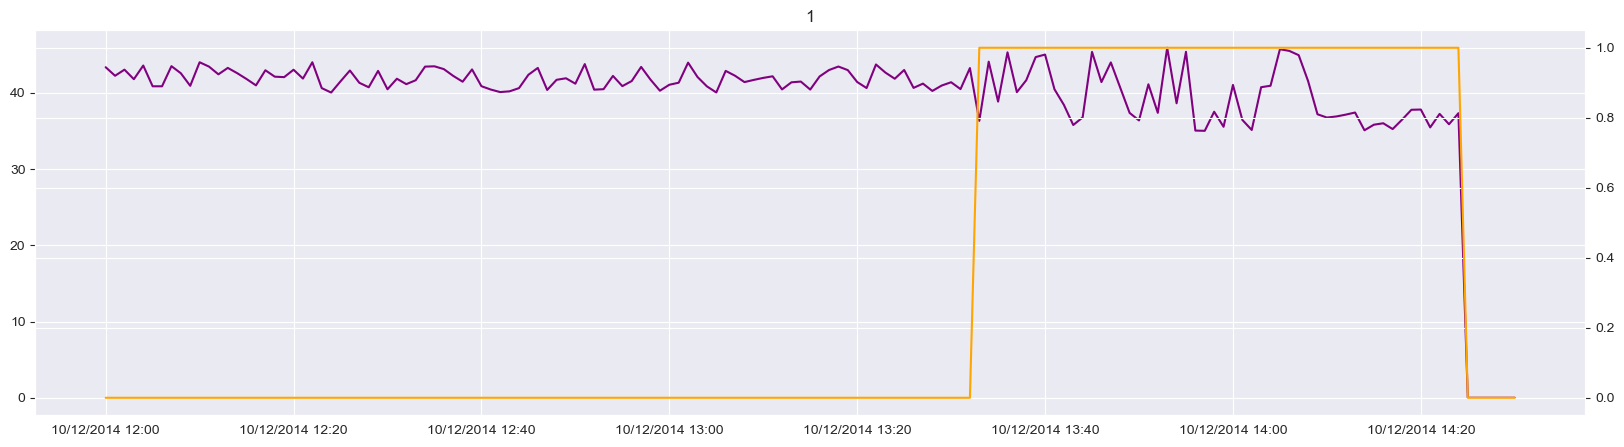

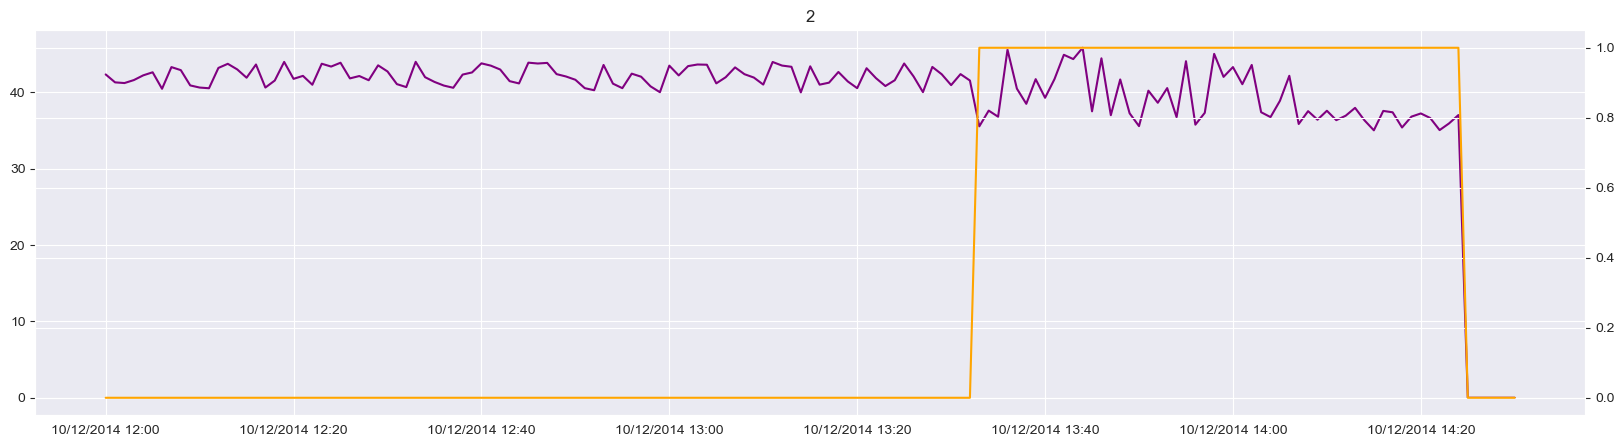

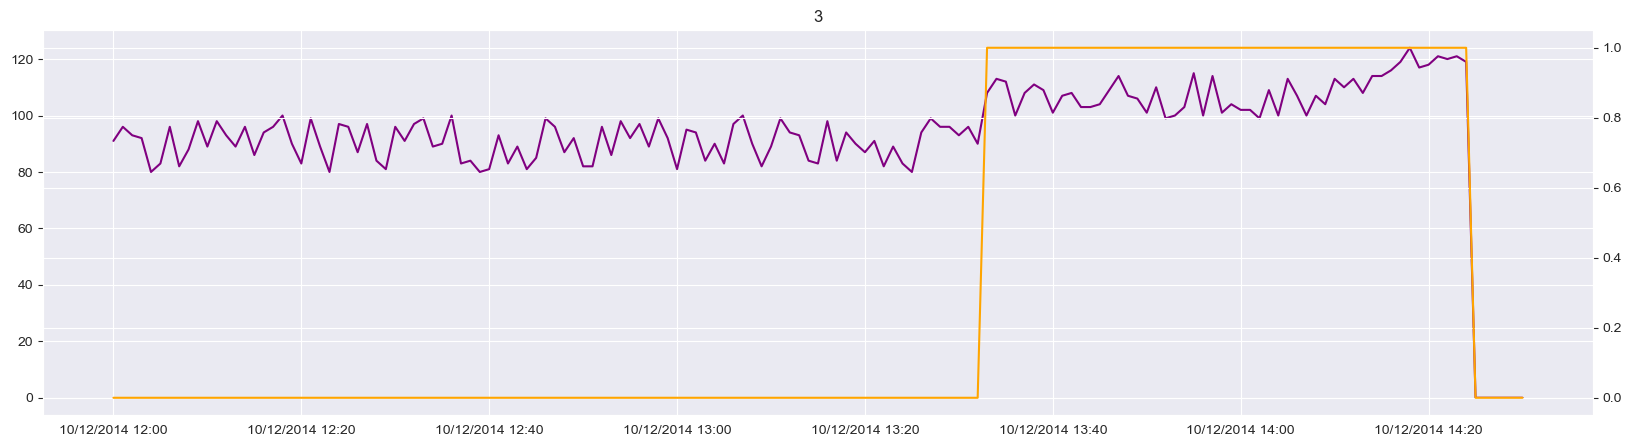

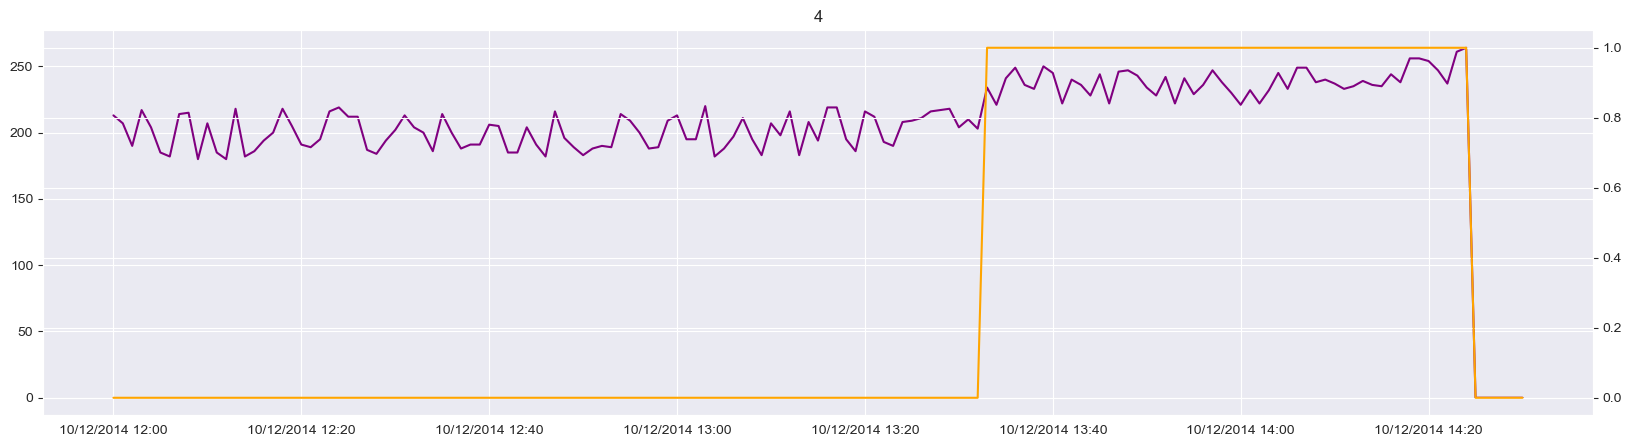

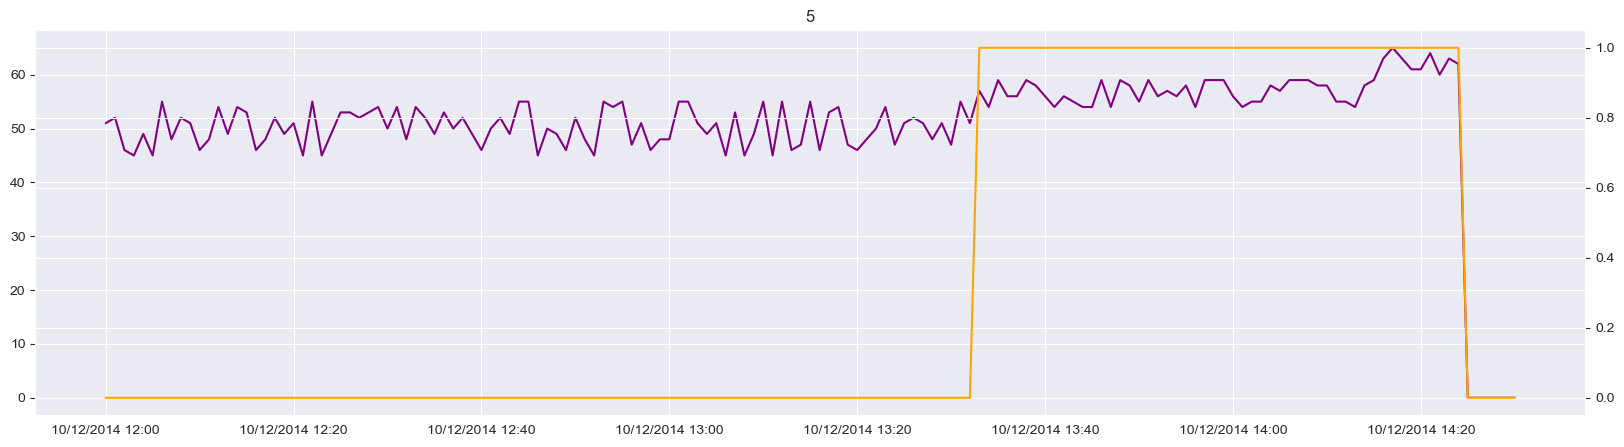

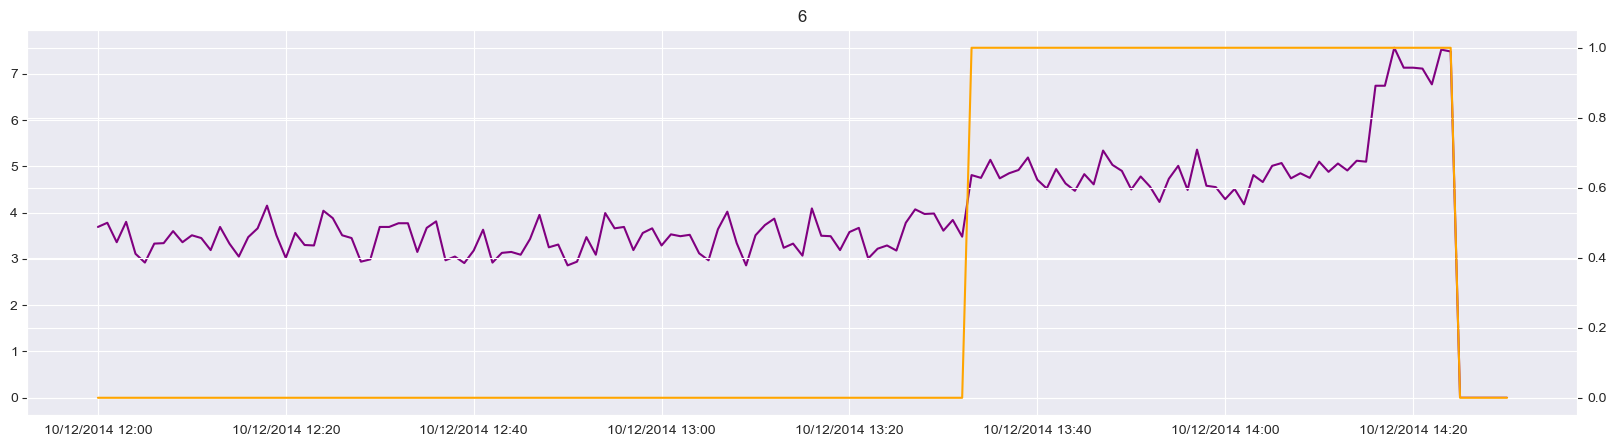

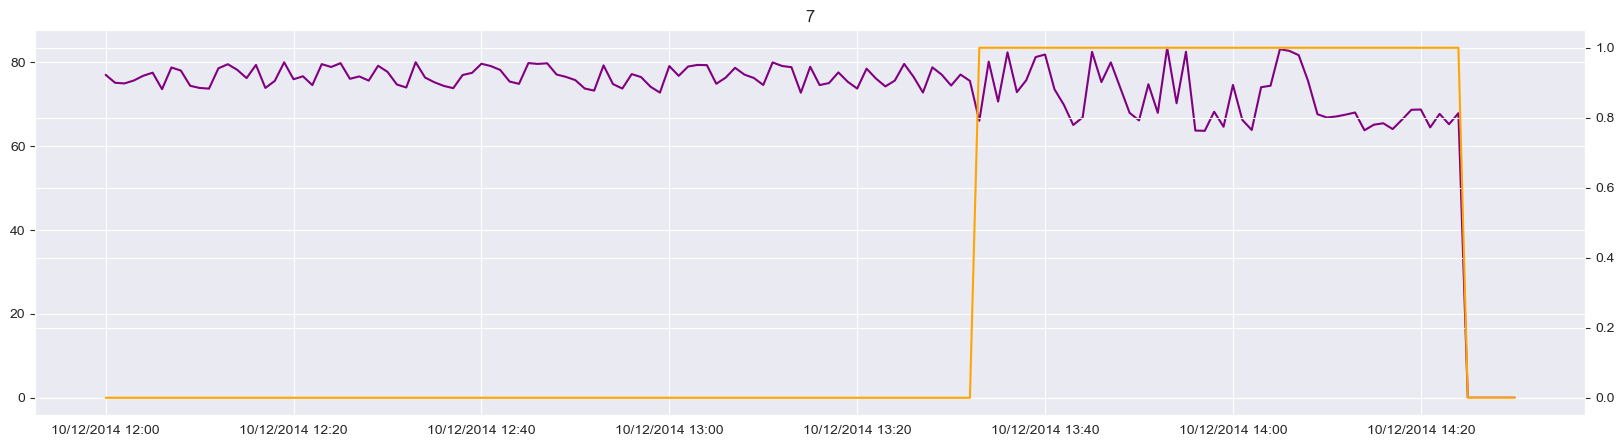

In [34]:
ListOfVariables=[1,2,3,4,5,6,7]
for item in ListOfVariables:
    fig, ax1 = plt.subplots()
    ax1.plot(df_filtered.iloc[:,item], color='purple') #We are looping through every item in the dataframe.
    ax1.xaxis.set_major_locator(plt.MaxNLocator(10)) #This will ensure we only plot a maximum of 10 Time Stamps
    ax2 = ax1.twinx() #The Twinx function is used to ensure we share the X-Axis for both plots
    ax2.plot(df_filtered['PUMP FAILURE (1 or 0)'], color='orange')
    ax2.xaxis.set_major_locator(plt.MaxNLocator(10))
    plt.title(item)
    plt.show()

# Part II: <span style="color:green">Inferential Statistical Analysis</span>

When you performed inferential statistics for Southern Water Corp using Excel, you made use of the data analysis package to create a heatmap using the correlation function. The heatmap showed the attributes that strongly correlated to Pump Failure. 

Now, you'll create a heatmap using Seaborn's heatmap function — another testament to the fact that having Matplotlib and Seaborn in your toolbox will allow you to quickly create beautiful graphics that provide key insights. 

### Step 10: <span style="color:purple">Create a Heatmap</span> 
i) Using Seaborn's heatmap function, create a heatmap that clearly shows the correlations (R) for all variables using the dataframe_raw dataset.

The syntax of Seaborn takes the following arguments:

<a href = https://seaborn.pydata.org/generated/seaborn.heatmap.html> sns.heatmap(correlated_dataframe, annot=True) </a>

You'll need to ensure you use the following <a href = https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html>.corr() </a>  function and apply this to your dataframe first, <b> before </b> passing this to the sns.heatmap() function.

## Please put your code here

#### We've included an example of what the output *may* look like below

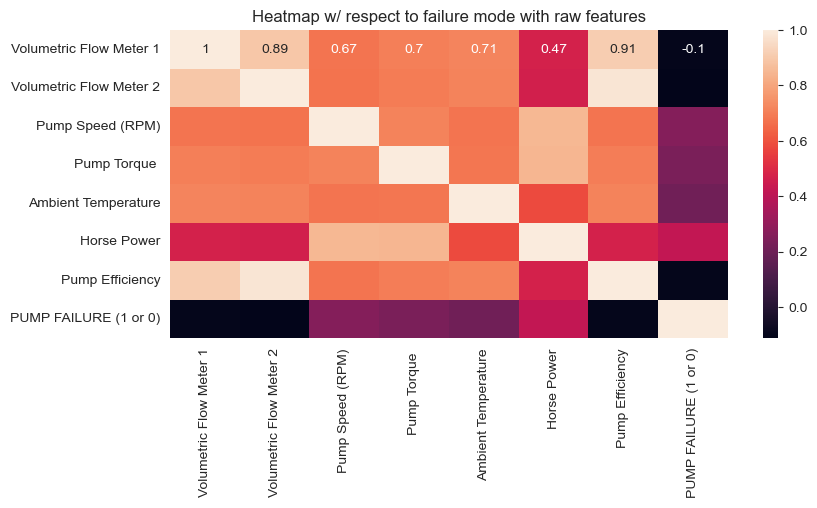

In [36]:
# calculating correlation of raw data #
# Select only numeric columns from the DataFrame
numeric_dataframe = dataframe_raw.select_dtypes(include=['number'])
corr = numeric_dataframe.corr()  # Calculate correlation on numeric data

# plotting heatmap of correlation for all variables using raw data #
plt.figure(figsize=(9, 4))

ax = sns.heatmap(corr, annot=True)  # Use the correlation matrix from numeric data

ax.set(title="Heatmap w/ respect to failure mode with raw features")

sns.set(font_scale=1)  # set fontsize

**Which variables seem to correlate with Pump Failure?**


The heatmap shows that the volumetric flow meters 1&2 and pump efficiency have the weakest correlations at about -0.1, as indicated by their black color. The near-zero negative coefficients suggest these three factors have little association with pump failure.


### Step 11: <span style="color:purple">Create a Barplot of Correlated Features</span>
<b> i) Using the correlated dataframe you've created earlier, create a barplot that shows the correlated features against PUMP FAILURE (1 or 0), in descending order. </b>

You'll have to think carefully regarding this question.

You'd know that you can get the correlation values from the following command:

    dataframe.corr()
    
Upon printing this out, you should get a **dataframe** that looks like the below:


In [38]:
numeric_dataframe = dataframe_raw.select_dtypes(include=['number'])

correlation_result = numeric_dataframe.corr().sort_values("PUMP FAILURE (1 or 0)", ascending=False)

correlation_result

,Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
PUMP FAILURE (1 or 0),-0.102508,-0.112115,0.260016,0.233193,0.207946,0.421694,-0.102696,1.000000
Horse Power,0.470081,0.462087,0.848416,0.847884,0.579374,1.000000,0.471731,0.421694
Pump Speed (RPM),0.674691,0.671896,1.000000,0.711037,0.674645,0.848416,0.677924,0.260016
Pump Torque,0.700425,0.692183,0.711037,1.000000,0.680159,0.847884,0.698527,0.233193
Ambient Temperature,0.713913,0.710423,0.674645,0.680159,1.000000,0.579374,0.712727,0.207946
Volumetric Flow Meter 1,1.000000,0.893058,0.674691,0.700425,0.713913,0.470081,0.913014,-0.102508
Pump Efficiency,0.913014,0.980144,0.677924,0.698527,0.712727,0.471731,1.000000,-0.102696
Volumetric Flow Meter 2,0.893058,1.000000,0.671896,0.692183,0.710423,0.462087,0.980144,-0.112115


You might think to yourself this looks **suspiciously like a dataframe with columns that you can manipulate**.

This is indeed the case. 

With this hint in mind, you should be able to **select the relevant column of interest and combine this with the .plot(kind='__') function to answer the question**. Don't forget to think about .sort_values() to help sort your data!

### Please put your code here

Text(0.5, 1.0, 'Correlations against Pump Failure')

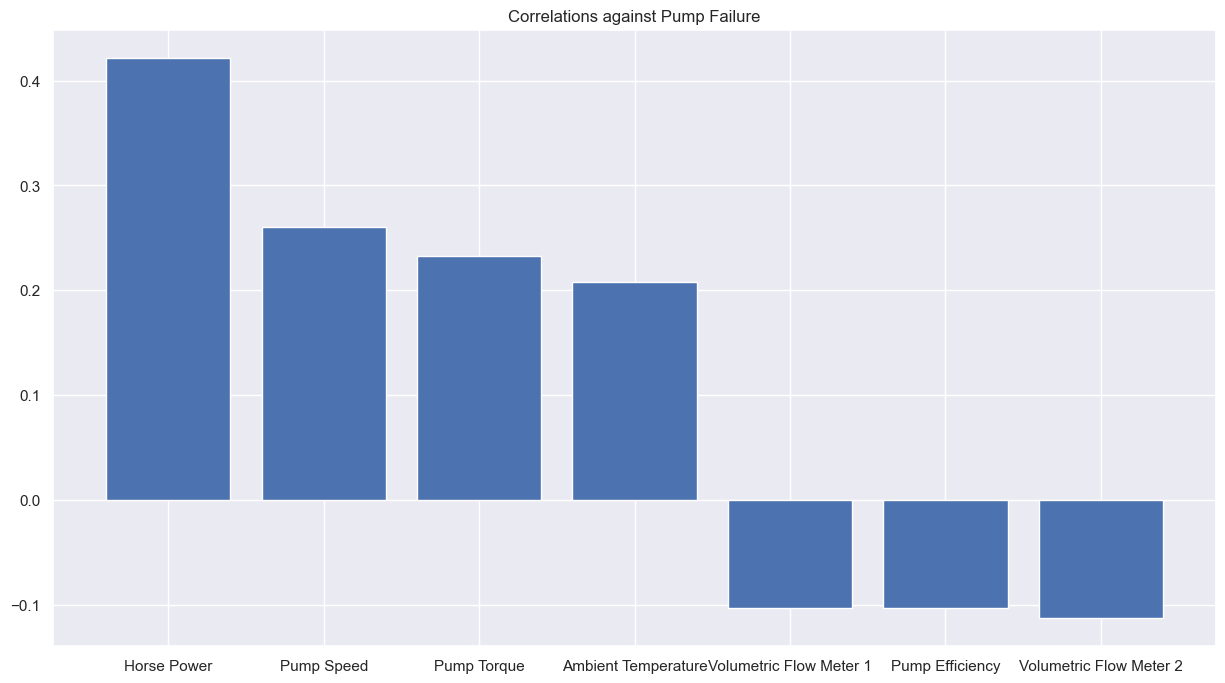

In [40]:
# Defining the correlation of features  against pump failure #
v1=dataframe_raw['Volumetric Flow Meter 1'].corr(dataframe_raw['PUMP FAILURE (1 or 0)'])
v2=dataframe_raw['Volumetric Flow Meter 2'].corr(dataframe_raw['PUMP FAILURE (1 or 0)'])
speed=dataframe_raw['Pump Speed (RPM)'].corr(dataframe_raw['PUMP FAILURE (1 or 0)'])
torque=dataframe_raw['Pump Torque '].corr(dataframe_raw['PUMP FAILURE (1 or 0)'])
temp=dataframe_raw['Ambient Temperature'].corr(dataframe_raw['PUMP FAILURE (1 or 0)'])
power=dataframe_raw['Horse Power'].corr(dataframe_raw['PUMP FAILURE (1 or 0)'])
eff=dataframe_raw['Pump Efficiency'].corr(dataframe_raw['PUMP FAILURE (1 or 0)'])

# Assigning the values #
x=['Volumetric Flow Meter 1','Volumetric Flow Meter 2','Pump Speed','Pump Torque','Ambient Temperature','Horse Power','Pump Efficiency']
y=[v1,v2,speed,torque,temp,power,eff]

# sorting the values in descing order #
df=pd.DataFrame({"Variable":x,"Correlations":y})
df_sorted_desc=df.sort_values('Correlations',ascending=False)

# Creating barplot of correlated features #
plt.figure(figsize=(15,8))
plt.bar('Variable','Correlations',data=df_sorted_desc)
plt.title('Correlations against Pump Failure')

---

### Step 12: <span style="color:purple">Create a Rolling Standard Deviation Heatmap</span> 
Previously, you created a correlation matrix using 'raw' variables. We saw *some* correlations with the raw data but they weren't necessarily as strong as we would have liked. This time, we'll recreate a Heatmap using the dataframe_stdev dataset you had imported in Step Two. 

<b> i) Using Seaborn's heatmap function, create a heatmap that clearly shows the correlations (including R) for all variables using the dataframe_stdev dataset. </b>


## Please put your code here

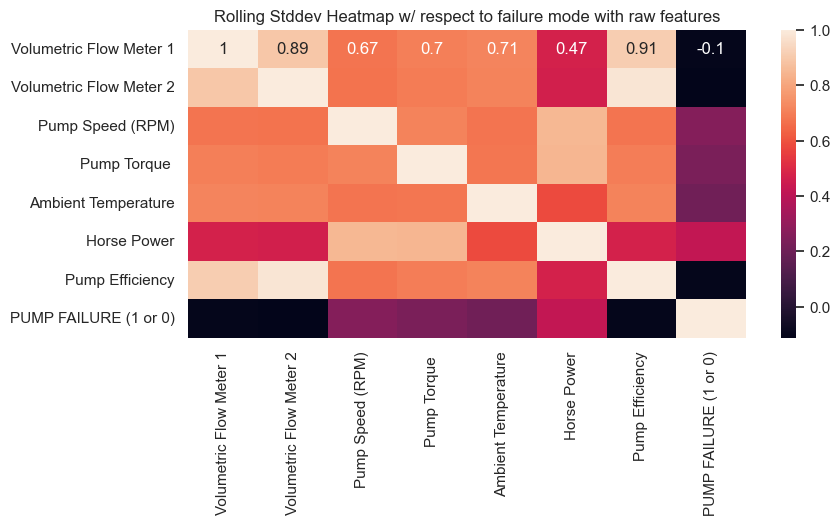

In [42]:
import numpy as np  # Importing NumPy to use np
import matplotlib.pyplot as plt  # Importing matplotlib for plotting
import seaborn as sns  # Importing seaborn for heatmap

plt.figure(figsize=(9,4))

# Select only numeric columns from the DataFrame
numeric_dataframe_stdev = dataframe_stdev.select_dtypes(include=[np.number])

# Calculate the correlation on the numeric DataFrame
ax = sns.heatmap(numeric_dataframe_stdev.corr(), annot=True)

ax.set(title="Rolling Stddev Heatmap w/ respect to failure mode with raw features")

sns.set(font_scale=1)  # set fontsize

<b> Do any variables stand out? If yes, list these out below your heatmap. </b>

The heatmap shows that Pump Torque, Ambient Temperature, and Pump Speed have the highest correlations to Pump Failure, in the 0.6 range. However, correlations in this range should only be considered moderately strong.

### Creating a Multivariate Regression Model


When you worked on this case study in Excel, you went through the tricky process of using the rolling standard deviation variables to generate a regression equation. Happily, this process is much simpler in Python.  

For this step, you'll be using the statsmodel.api library you imported earlier and calling the Ordinary Least Squares Regression to create a multivariate regression model (which is a linear regression model with more than one independent variable).

### Step 13: <span style="color:purple">Use OLS Regression</span> 
<b> i) Using the OLS Regression Model in the statsmodel.api library, create a regression equation that models the Pump Failure (Y-Variable) against all your independent variables in the dataframe_raw dataset. </b>

In order to fit a linear regression model with statsmodels.api there are a few steps that need to be taken. We have demonstrated this below:

<b> Don't forget to reimport the dataframes you've previously imported in Step 2 before starting these steps </b> 

    1. Establish two dataframes named, independent_variables and dependent_variables. The independent variables are known as explanatory variables - they help EXPLAIN what you are trying to model. Dependent Variable on the other hand is the variable of interest that you want to MODEL. In this case, the Dependent Variable is Pump Failure (1 or 0).
    
    2. Add a constant to your Independent Dataframe via the following syntax:
    independent_variables = sm.add_constant(independent_variables). This will simply add a constant stream of 1's in a column to your dataframe. This constant is used to account for bias in the model.  
    
    3. Store and Fit your model with the below syntax:
    regression_model = sm.OLS(dependent_variable,independent_variable).fit() 
    
    4. Print the regression_model.summary() to view the Regression Statistics 


<b> ii) Repeat i) but this time use the dataframe_stdev you imported previously.</b>

You will repeat the same steps as you have done in i) only you will be changing the dataset from dataset_raw to dataset_stdev. 


## Please put your code here 

In [44]:
import statsmodels.api as sm
independent_variables= dataframe_raw.iloc[:, 2:9]
dependent_variable = dataframe_raw['PUMP FAILURE (1 or 0)']

independent_variables = sm.add_constant(independent_variables)
raw_regression_model = sm.OLS(dependent_variable, independent_variables).fit()
print(raw_regression_model.summary())

                              OLS Regression Results                             
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.362
Model:                               OLS   Adj. R-squared:                  0.360
Method:                    Least Squares   F-statistic:                     197.9
Date:                   Fri, 01 Nov 2024   Prob (F-statistic):          5.58e-233
Time:                           09:56:32   Log-Likelihood:                 1823.0
No. Observations:                   2453   AIC:                            -3630.
Df Residuals:                       2445   BIC:                            -3583.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [118]:
import statsmodels.api as sm
independent_variables= dataframe_stdev.iloc[:, 2:9]
dependent_variable = dataframe_stdev['PUMP FAILURE (1 or 0)']

independent_variables = sm.add_constant(independent_variables)
stdev_regression_model = sm.OLS(dependent_variable, independent_variables).fit()
print(stdev_regression_model.summary())

                              OLS Regression Results                             
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       1.000
Model:                               OLS   Adj. R-squared:                  1.000
Method:                    Least Squares   F-statistic:                 7.390e+31
Date:                   Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                           09:22:22   Log-Likelihood:                 3367.9
No. Observations:                    100   AIC:                            -6732.
Df Residuals:                         98   BIC:                            -6727.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


<h4> <b> Compare the Models you've created and observe the R Squared displayed for each model - which model seems better and why? Put your thoughts down below.  </b> If you're not sure how to answer this, you should reference the resource <a href = https://blog.minitab.com/en/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit> here </a> for a more detailed explanation.



With its higher R-squared (.78) and lower AIC and BIC scores (~-6000), the dataframe_stdev model appears to have a better fit and lower error than the raw data model.

### Step 14: <span style="color:purple">Analysis of Coefficients </span>

Great job creating those regressive equations! You've reached the final two steps of this case study!

We've now identified that *one* of our regressive models has a better fit than the previous model.

Using this model, we want to **extract** the co-efficients to better understand the variables that display the largest *absolute* rate of change with respect to Pump Failure. We'll use the co-efficients to better assess this from an *absolute* rate of change perspective. (i.e. Which variables spike the most in relation to Pump Failure?)

<b> i) Using the .params method, extract the Coefficients from your regression_model and create a bar plot that identifies which coefficients react most strongly with respect to Pump Failure. Which three (3) variables seem to showcase the
strongest 'relationship' with respect to Pump Failure? </b>

You can use params via the following syntax:

    model.params where model represents the name of the regression model you've created.

We've included an example below that showcases what your chart should look like upon completion of this exercise. 



## Please put your code here

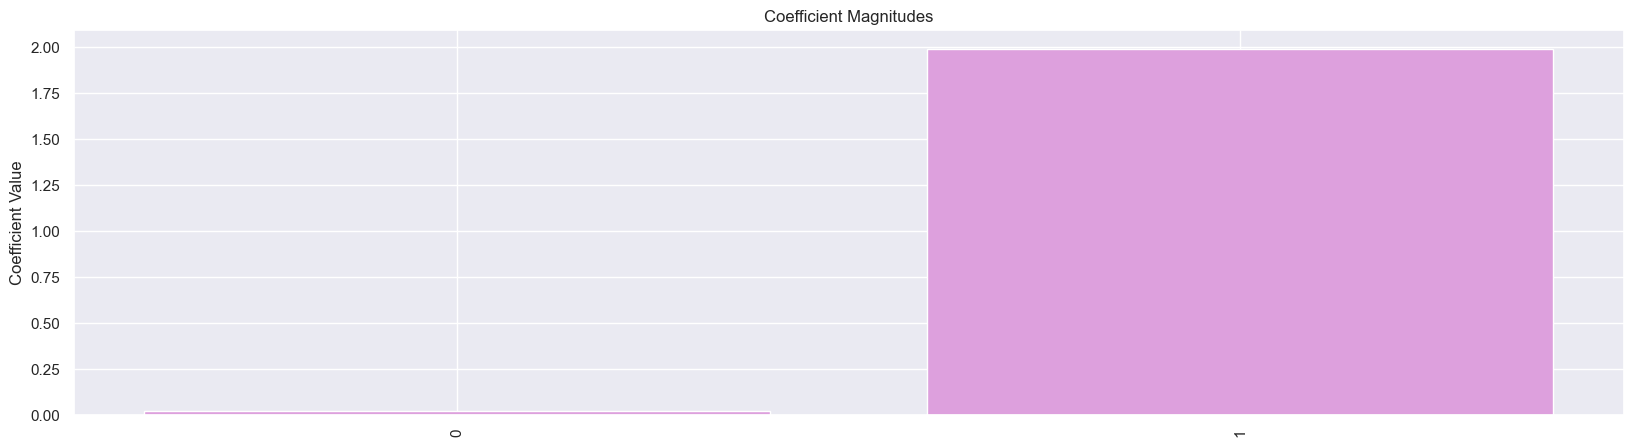

In [50]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Example data
np.random.seed(0)
X = np.random.rand(100, 1)  # 100 random values for the independent variable
y = 2 * X.flatten() + np.random.normal(0, 0.1, 100)  # Dependent variable with some noise

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
stdev_regression_model = sm.OLS(y, X).fit()  # Ordinary Least Squares regression

# Now we can access the coefficients
coeff = stdev_regression_model.params

# Convert coefficients to a pandas Series for sorting
coeff = pd.Series(coeff)  # Convert to Series to use sort_values()

# Sort the coefficients
coeff = coeff.sort_values()

# Plotting the coefficients
plt.bar(range(len(coeff)), coeff, color='plum')
plt.xticks(range(len(coeff)), coeff.index, rotation=90)
plt.title('Coefficient Magnitudes')
plt.ylabel('Coefficient Value')
plt.show()  # Corrected to call show() as a function

<h3> <span style="color:orange"> Please note that Step 15 is a Challenge Questions and will intentionally be more difficult </h3> 


### Step 15: <span style="color:purple">Validate Predictions</span> 

Now it's time for us to <b> validate our predictions. </b>
    
Once you've created a regressive_model, you can call this using the following syntax:

        regressive_model.predict(independent_variables). 
        
Extra information regarding how this works can be found <a href = https://www.statsmodels.org/stable/examples/notebooks/generated/predict.html> here </a>

<b> 
i) Create a new column in the dataframe_stdev, called, 'Prediction'. 
    
ii) Use the regression equation you created in the previous step and apply the .predict() function to the independent variables in the dataframe_stdev dataset so you get a column full of your regressive predictions.
    
iii) Create a Dual-Axis Plot with the following axes items: <p>
    
        Axes One would contain: Volumetric Flow Meter 2, Pump Efficiency and Horse Power 
        Axes two would contain: Pump Failure (1 or 0) and Prediction
</b>


**Note:** Don't forget how to use .twinx() to help you out with the dual axis!

We've included an example below of how your chart might look once you're done!

## Please put your code here

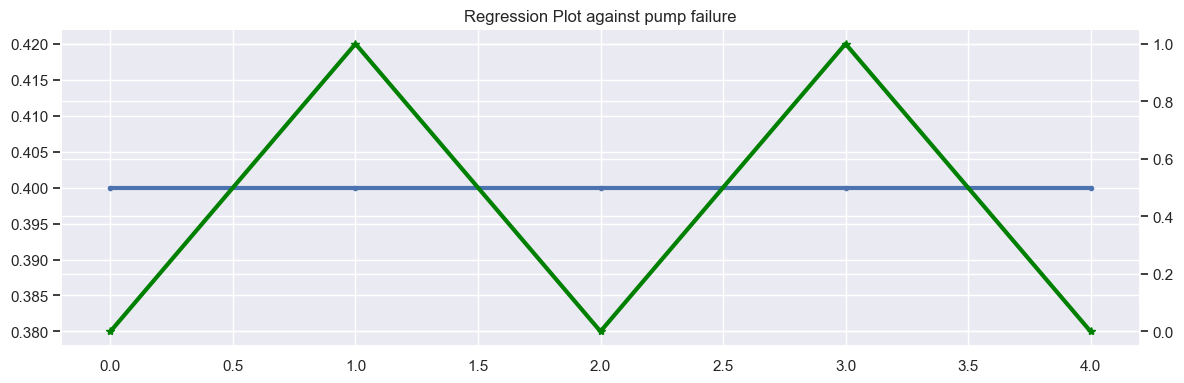

In [54]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Example: Creating a sample DataFrame for X1
X1 = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5],  # Example feature
    'feature2': [5, 4, 3, 2, 1]   # Example feature
})

# Example target variable (you should replace this with your actual target data)
y = np.array([0, 1, 0, 1, 0])  # Example target for pump failure

# Define and train the model
stdev_model = LinearRegression()  # Initialize the model
stdev_model.fit(X1, y)  # Train the model with features X1 and target y

# Validating predictions for pump failure
ypred1 = stdev_model.predict(X1)  # Now stdev_model is defined

# Plotting the chart
fig, ax = plt.subplots(figsize=(12, 4))
ax = pd.Series(ypred1).plot(linewidth=3, marker='.')  # Convert ypred1 to a Series for plotting

# Assuming dataframe_stdev is defined elsewhere in your code
dataframe_stdev = pd.DataFrame({'PUMP FAILURE (1 or 0)': [0, 1, 0, 1, 0]})  # Example data

ax1 = ax.twinx()
ax1.plot(dataframe_stdev['PUMP FAILURE (1 or 0)'], 'green', linewidth=3, marker='*')
plt.title('Regression Plot against pump failure')

plt.tight_layout()
plt.show()

<h3> You've made it to the end of this challenging case study — well done! </h3>

You've learnt to perform a number of things in Python that you weren't familiar with previously.

You've been able to:

<li> Create Line Plots and Box Plots </li>
<li> Understand Descriptive Statistics from the .describe() functions </li>
<li> How to Detect and Remove Outliers from your Dataset </li>
<li> How to Subset and Filter your Dataframes </li>
<li> How to use For Loops to smartly loop through data </li>
<li> How to use Dual Axes to Plot Multiple Variables on different axes </li>
<li> How to interpret Correlation Coefficients and Heatmaps </li>
<li> How to create and assess the goodness of fit for your Linear Regression Models </li>

Well done! This is just the start of your foundation in Python as you grow more proficient in practicing against datasets both big and small.

Keep up the fantastic work and as always - if you have any questions, don't hesitate to reach out to the community, your mentor, or #slack channel for extra support!

<h3> Keep up the amazing work! </h3>
